In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def constant_bet_red(
    x: float,
    fixed_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    prob = x / 100

    for iteration in range(num_simulations):
        bankroll = initial_bankroll
        for round in range(num_rounds):
            if random.random() <= prob:
                bankroll += fixed_bet
            else:
                bankroll -= fixed_bet
            if bankroll <= 0:
                ruin += 1
                break
        else:
            ret += bankroll

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin

In [3]:
def doubling_bet_red(
    x: float,
    initial_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    prob = x / 100

    for iteration in range(num_simulations):
        next_bet = initial_bet
        bankroll = initial_bankroll
        for round in range(num_rounds):
            if random.random() <= prob:
                bankroll += next_bet
                next_bet = initial_bet
            else:
                bankroll -= next_bet
                next_bet *= 2
            if bankroll <= 0:
                ruin += 1
                break
        else:
            ret += bankroll

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin

In [4]:
def constant_bet_green(
    x: float,
    fixed_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    prob = 1 - 2 * x / 100

    for iteration in range(num_simulations):
        bankroll = initial_bankroll
        for round in range(num_rounds):
            if random.random() <= prob:
                bankroll += 17 * fixed_bet
            else:
                bankroll -= fixed_bet
            if bankroll <= 0:
                ruin += 1
                break
        else:
            ret += bankroll

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin

In [5]:
def random_bet(
    x: float,
    fixed_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    colors = ['red', 'black', 'green']

    for iteration in range(num_simulations):
        bankroll = initial_bankroll
        for round in range(num_rounds):
            color = random.choice(colors)
            if color == 'red' or color == 'black':
                prob = x / 100
                payout_factor = 1
            else:
                prob = 1 - 2 * x / 100
                payout_factor = 17
            u = random.random()
            if u <= prob:
                bankroll += payout_factor * fixed_bet
            else:
                bankroll -= fixed_bet
            if bankroll <= 0:
                ruin += 1
                break
        else:
            ret += bankroll

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin

In [6]:
x_vals = []
strategies = [
    constant_bet_red,
    doubling_bet_red,
    constant_bet_green,
    random_bet
]
colors = ['y', 'r', 'g', 'm']
returns = [
    [] for _ in strategies
]
ruins = [
    [] for _ in strategies
]

In [7]:
gran = 2
for i in range(1, 50 * gran):
    x = i / gran
    x_vals.append(x)
    print(x, end=' ')
    for j, strategy in enumerate(strategies):
        ret, ruin = strategy(x)
        returns[j].append(ret)
        ruins[j].append(ruin)

0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0 8.5 9.0 9.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5 16.0 16.5 17.0 17.5 18.0 18.5 19.0 19.5 20.0 20.5 21.0 21.5 22.0 22.5 23.0 23.5 24.0 24.5 25.0 25.5 26.0 26.5 27.0 27.5 28.0 28.5 29.0 29.5 30.0 30.5 31.0 31.5 32.0 32.5 33.0 33.5 34.0 34.5 35.0 35.5 36.0 36.5 37.0 37.5 38.0 38.5 39.0 39.5 40.0 40.5 41.0 41.5 42.0 42.5 43.0 43.5 44.0 44.5 45.0 45.5 46.0 46.5 47.0 47.5 48.0 48.5 49.0 49.5 

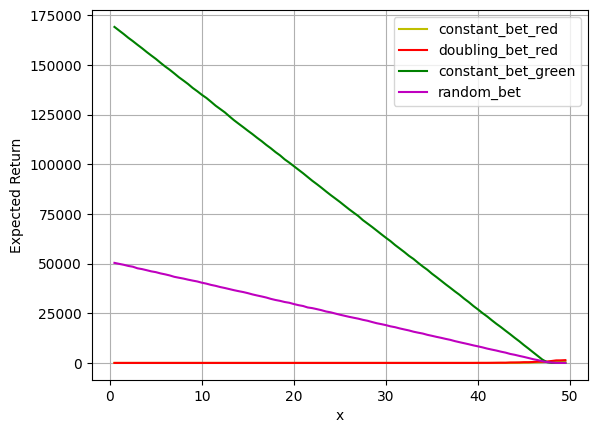

In [8]:
for i, strategy in enumerate(strategies):
    plt.plot(x_vals, returns[i], label=strategy.__name__, color=colors[i])
plt.xlabel("x")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
plt.show()

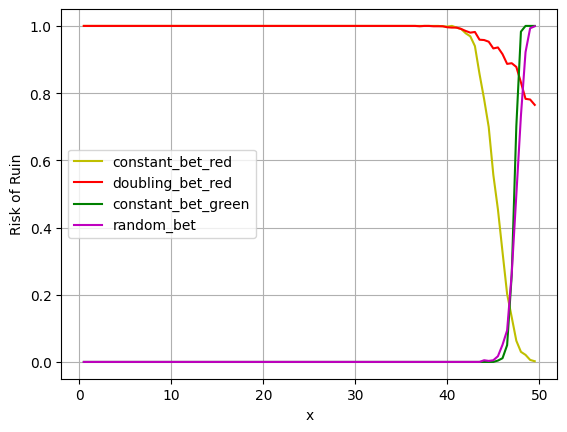

In [9]:
for i, strategy in enumerate(strategies):
    plt.plot(x_vals, ruins[i], label=strategy.__name__, color=colors[i])
plt.xlabel("x")
plt.ylabel("Risk of Ruin")
plt.grid(True)
plt.legend()
plt.show()